#Resolucion Tarea Titanic

Docente: Gabriela Espinoza Picado

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carga del conjunto de datos
file_path = '/content/titanic (3).csv'
titanic_data = pd.read_csv(file_path)


In [5]:

# Análisis exploratorio básico
print(titanic_data.head())
print(titanic_data.describe())
print(titanic_data.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [6]:
# Limpieza de datos
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data.drop(columns=['Cabin'], inplace=True) # Ejemplo de eliminación de una columna con muchos datos faltantes


In [7]:
# Creación de nuevas características (ejemplo)
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']

In [8]:

# Codificación de variables categóricas y estandarización
categorical_features = ['Sex', 'Embarked']
numerical_features = ['Age', 'Fare', 'FamilySize']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])



In [9]:
# División en conjunto de entrenamiento y prueba
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [15]:

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare',
                                                   'FamilySize']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

In [16]:
# Evaluación del modelo
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7877094972067039
Recall: 0.6891891891891891
F1 Score: 0.7285714285714284
Confusion Matrix:
 [[90 15]
 [23 51]]


* ccuracy (Precisión): 0.7877

Esta es la proporción de predicciones correctas sobre el total de predicciones. En tu caso, aproximadamente el 78.77% de las predicciones del modelo son correctas.
* Recall (Sensibilidad): 0.6892

El recall mide la proporción de positivos reales (en este caso, pasajeros que realmente sobrevivieron) que fueron identificados correctamente. Un recall de 0.6892 significa que el modelo identificó correctamente alrededor del 68.92% de los pasajeros que sobrevivieron.
* F1 Score: 0.7286

El F1 Score es una medida que combina la precisión y el recall. Es útil cuando se busca un equilibrio entre estas dos métricas, especialmente si la distribución de clases es desigual. Un F1 Score de 0.7286 es un valor intermedio que sugiere un equilibrio razonable entre precisión y recall.
* Confusion Matrix: [[90 15] [23 51]]

La matriz de confusión muestra el número de predicciones correctas e incorrectas en cada clase. Aquí, 90 y 51 son el número de predicciones correctas para las clases "no sobrevivido" y "sobrevivido", respectivamente, mientras que 15 y 23 son los errores para cada clase.

* Verdaderos Negativos (90): El modelo predijo correctamente que 90 personas no sobrevivirían (y efectivamente no sobrevivieron). Estas son las predicciones correctas para la clase "no sobrevivido".

* Falsos Positivos (15): El modelo predijo incorrectamente que 15 personas sobrevivirían, pero en realidad no lo hicieron. Estas son las predicciones incorrectas donde el modelo erróneamente asignó a pasajeros a la clase "sobrevivido".

* Falsos Negativos (23): El modelo predijo incorrectamente que 23 personas no sobrevivirían, pero en realidad sí lo hicieron. Estas son las predicciones incorrectas donde el modelo erróneamente asignó a pasajeros a la clase "no sobrevivido".

* Verdaderos Positivos (51): El modelo predijo correctamente que 51 personas sobrevivirían (y efectivamente sobrevivieron). Estas son las predicciones correctas para la clase "sobrevivido".

En resumen, la matriz de confusión se compone de:

* Esquina superior izquierda (90): Número de predicciones correctas de no sobrevivientes.
* Esquina superior derecha (15): Número de predicciones incorrectas donde se predijo supervivencia pero el pasajero no sobrevivió.
* Esquina inferior izquierda (23): Número de predicciones incorrectas donde se predijo no supervivencia pero el pasajero sobrevivió.
* Esquina inferior derecha (51): Número de predicciones correctas de supervivientes.

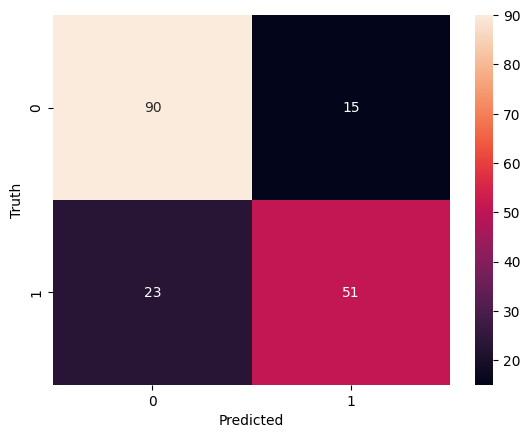

In [17]:
# Visualización de la Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [18]:
# Accediendo a los coeficientes del modelo
coefficients = model.named_steps['classifier'].coef_[0]
features = numerical_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())

# Imprimiendo los coeficientes
print("Coeficientes del Modelo de Regresión Logística:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef}")


Coeficientes del Modelo de Regresión Logística:
Age: -0.19493751420432473
Fare: 0.6719219919831488
FamilySize: -0.498045386882706
Sex_female: 1.3003854863288467
Sex_male: -1.3042131515205986
Embarked_C: 0.28947568406677016
Embarked_Q: -0.3287111321374043
Embarked_S: -0.19615785565350133
Embarked_nan: 0.2315656385323874


* Edad (Age): -0.1949

Por cada año adicional de edad, la probabilidad de supervivencia disminuye. Esto sugiere que los pasajeros más jóvenes tenían más probabilidades de sobrevivir que los mayores.
* Tarifa (Fare): 0.6719

Un coeficiente positivo implica que a medida que aumenta la tarifa pagada, también aumenta la probabilidad de supervivencia. Esto podría reflejar que los pasajeros que pagaron tarifas más altas (posiblemente viajando en clases superiores) tenían mayores probabilidades de supervivencia.
* Tamaño de la Familia (FamilySize): -0.4980

Un tamaño de familia más grande está asociado con una menor probabilidad de supervivencia. Esto puede indicar que las familias más grandes encontraron más dificultades para evacuar juntas o tenían preferencias para quedarse juntas.
* Sexo (Sex_female y Sex_male): 1.3004 y -1.3042

Los coeficientes aquí muestran una fuerte influencia del género en la supervivencia. Ser mujer (Sex_female) aumenta significativamente la probabilidad de supervivencia, mientras que ser hombre (Sex_male) tiene el efecto contrario. Esto refleja la política de "mujeres y niños primero" en los botes salvavidas.
* Embarque (Embarked_C, Embarked_Q, Embarked_S, Embarked_nan):

Embarked_C (embarque en Cherbourg) tiene un coeficiente positivo, sugiriendo que los pasajeros que embarcaron allí tenían más probabilidades de sobrevivir.
Embarked_Q (Queenstown) y Embarked_S (Southampton) tienen coeficientes negativos, indicando una menor probabilidad de supervivencia para los pasajeros de estos puertos.
Embarked_nan representa los datos faltantes en esta categoría. Su coeficiente positivo es más difícil de interpretar directamente y podría estar influido por cómo se manejaron los datos faltantes durante la preparación de los datos.